In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', skiprows=1, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Y = pima.label
X = pima.drop(['label'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
x_train

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [7]:
y_train

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: label, Length: 614, dtype: int64

In [8]:
cls = LogisticRegression(max_iter=200)

In [9]:
cls.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
y_pred = cls.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [11]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

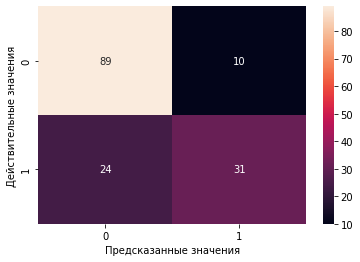

In [12]:
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [13]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [14]:
metrics.precision_score(y_test, y_pred, pos_label=1)

0.7560975609756098

In [15]:
metrics.recall_score(y_test, y_pred, pos_label=1)

0.5636363636363636

# Дополнительные задания
1. Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.
2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.
3. Постройте модели классификации на основе следующих методов:
    * логистическая регрессия (LogisticRegression);
    * метод опорных векторов с линейным ядром (SVC);
    * метод опорных векторов с гауссовым ядром (SVC);
    * метод k ближайших соседей (KNeighborsClassifier);
    * многослойный перцептрон (MLP);
    * другие методы по желанию;
4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

### 1. Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

In [16]:
from sklearn import svm

In [17]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [18]:
y_pred_vector = clf.predict(x_test)
y_pred_vector

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

### 2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

In [19]:
metrics.confusion_matrix(y_test, y_pred_vector)

array([[93,  6],
       [27, 28]], dtype=int64)

In [20]:
if metrics.accuracy_score(y_test, y_pred) < metrics.accuracy_score(y_test, y_pred_vector):
    print("Модель с методом опорных векторов предсказала лучше")
else:
    print("Модель с методом опорных векторов предсказала хуже")

Модель с методом опорных векторов предсказала лучше


In [21]:
if metrics.precision_score(y_test, y_pred) < metrics.precision_score(y_test, y_pred_vector):
    print("Модель с методом опорных векторов предсказала лучше")
else:
    print("Модель с методом опорных векторов предсказала хуже")

Модель с методом опорных векторов предсказала лучше


In [22]:
if metrics.recall_score(y_test, y_pred) < metrics.recall_score(y_test, y_pred_vector):
    print("Модель с методом опорных векторов предсказала лучше")
else:
    print("Модель с методом опорных векторов предсказала хуже")

Модель с методом опорных векторов предсказала хуже


## Можно сказать, что модель с методом опорных векторов предсказывает лучше

### 3. Постройте модели классификации на основе следующих методов:
* логистическая регрессия (LogisticRegression);
* метод опорных векторов с линейным ядром (SVC);
* метод опорных векторов с гауссовым ядром (SVC);
* метод k ближайших соседей (KNeighborsClassifier);
* многослойный перцептрон (MLP);

In [23]:
linear_svc = svm.SVC(kernel="linear")
linear_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred_linear = linear_svc.predict(x_test)
y_pred_linear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

C = 1.0
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", C=C),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=1, max_iter=300)
    # svm.LinearSVC(C=C, max_iter=10000),
)

models = [clf.fit(x_train, y_train) for clf in models]
titles = [
    "метод опорных векторов с линейным ядром (SVC)",
    "метод опорных векторов с гауссовым ядром (SVC)",
    "метод k ближайших соседей (KNeighborsClassifier)",
    "многослойный перцептрон (MLP)",
]

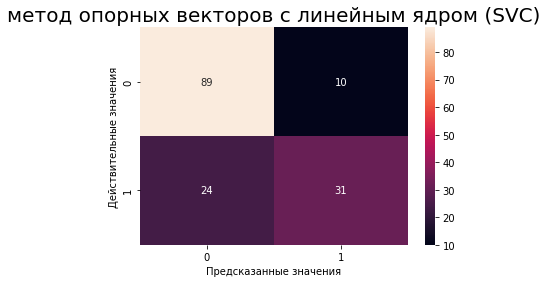

Метрика достоверности предсказания:  0.7792207792207793
Метрика точности:  0.7560975609756098
Метрика полноты:  0.5636363636363636




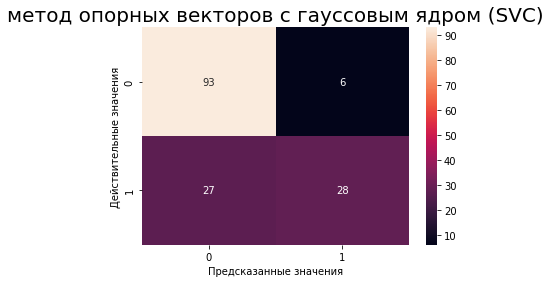

Метрика достоверности предсказания:  0.7857142857142857
Метрика точности:  0.8235294117647058
Метрика полноты:  0.509090909090909




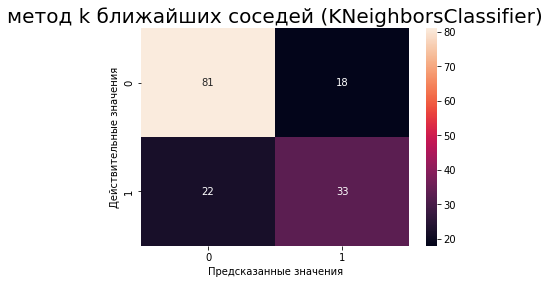

Метрика достоверности предсказания:  0.7402597402597403
Метрика точности:  0.6470588235294118
Метрика полноты:  0.6




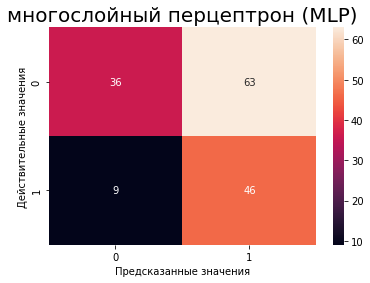

Метрика достоверности предсказания:  0.5324675324675324
Метрика точности:  0.42201834862385323
Метрика полноты:  0.8363636363636363




In [29]:
for clf, title in zip(models, titles):
    y_pred = clf.predict(x_test)

    class_names = [0, 1]
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize = 20)
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

    print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
    print("Метрика точности: ", metrics.precision_score(y_test, y_pred))
    print("Метрика полноты: ", metrics.recall_score(y_test, y_pred), end="\n\n\n")

### 4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

#### Как мы видим, у метода MLP худший результат, однако у него наибольшая полнота - т.е. данный метод наиболее точно находит объекты положительного класса

#### Метод k ближайших соседей (KNeighborsClassifier) и метод опорных векторов с линейным ядром (SVC) имеют самые сбалансированные результаты среди всех моделей, однако точность прогнозов оставляет желать лучшего

#### Метод опорных векторов с гауссовым ядром (SVC) показывает наиболее точные прогнозы, однако у него наименьшая полнота среди всех результатов